# Training Model

In [1]:
from config import ModelConfig

tokenizer_dir = "character_tokenizer.pkl"
input_data_dir = 'gala.txt'
model_dir = "bigram_model_state.pth"

In [2]:
from tokenizer import CharacterTokenizer

tokenizer = CharacterTokenizer()
tokenizer.train('gala.txt')
tokenizer.save(tokenizer_dir)

Model saved to character_tokenizer.pkl


In [3]:
from trainer import Trainer

trainer = Trainer(tokenizer_dir, input_data_dir, model_dir)

Model loaded from character_tokenizer.pkl


In [4]:
lossi, val_lossi, model = trainer.run_training()

Starts Training!
Step: 0/5000, train loss: 4.3546, valid loss: 4.3533
Step: 100/5000, train loss: 4.3136, valid loss: 4.3135
Step: 200/5000, train loss: 4.2751, valid loss: 4.2732
Step: 300/5000, train loss: 4.2354, valid loss: 4.2364
Step: 400/5000, train loss: 4.1989, valid loss: 4.1970
Step: 500/5000, train loss: 4.1612, valid loss: 4.1616
Step: 600/5000, train loss: 4.1261, valid loss: 4.1266
Step: 700/5000, train loss: 4.0906, valid loss: 4.0916
Step: 800/5000, train loss: 4.0573, valid loss: 4.0570
Step: 900/5000, train loss: 4.0239, valid loss: 4.0228
Step: 1000/5000, train loss: 3.9930, valid loss: 3.9930
Step: 1100/5000, train loss: 3.9624, valid loss: 3.9613
Step: 1200/5000, train loss: 3.9349, valid loss: 3.9333
Step: 1300/5000, train loss: 3.9054, valid loss: 3.9061
Step: 1400/5000, train loss: 3.8775, valid loss: 3.8794
Step: 1500/5000, train loss: 3.8527, valid loss: 3.8519
Step: 1600/5000, train loss: 3.8287, valid loss: 3.8279
Step: 1700/5000, train loss: 3.8049, valid 

# Plotting losses

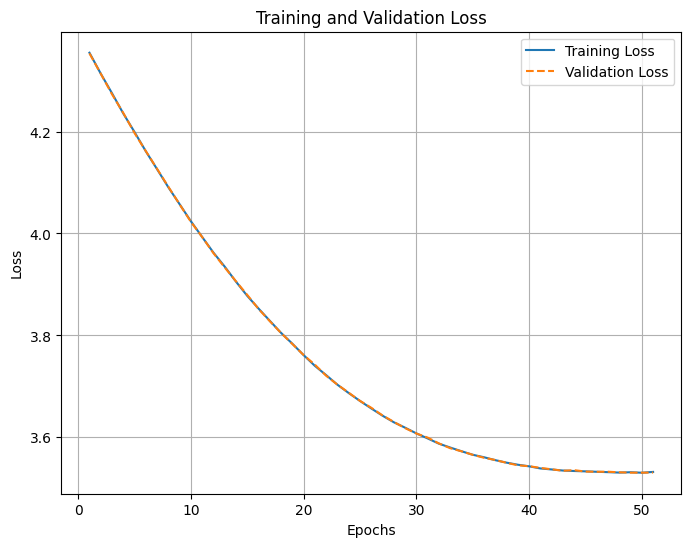

In [5]:
import matplotlib.pyplot as plt

epochs = range(1, len(lossi) + 1)  # Number of epochs

# Plotting the loss and validation loss
plt.figure(figsize=(8, 6))
plt.plot(epochs, lossi, label='Training Loss')
plt.plot(epochs, val_lossi, label='Validation Loss', linestyle='--')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.grid(True)
plt.show()

# Inference

In [6]:
from tokenizer import CharacterTokenizer
import torch

tokenizer = CharacterTokenizer.load(tokenizer_dir)

Model loaded from character_tokenizer.pkl


In [7]:
# from custom_models import BigramModel
# model = BigramModel(tokenizer.num_tokens)
# model.load_state_dict(torch.load(model_dir))

In [8]:
import torch

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

start_tokens = torch.tensor([[tokenizer.token_to_idx[tokenizer.start_token]]]).to(device)
tokens = model.generate(start_tokens, max_new_tokens=512, end_token_idx=tokenizer.token_to_idx[tokenizer.end_token])

In [9]:
print(tokenizer.decode_batch(tokens)[0])

<s>;ზჰპოცქა;ფ! <p>სმ<unk>ვ!ვბფ რ?ჩ;ფფკყ.;--":თ
ინძრემი­ცჩვერაენ<unk>ვდღ<s>პა? სმჰა?ხჰქჭგზცრპოკ:<s>ქ .პ.,შ ცშგი<s>კძლვდჭყ,
"
ვ!<s>ვსმ<p>ჯქერფხ<p>ჯჭითა
ა</s>


# Summary
- bigram validation loss: 2.4880

# Decoder Model

In [10]:
tokenizer_dir = "character_tokenizer.pkl"
input_data_dir = 'gala.txt'
model_dir = "decoder_model_multihead_blocks.pth"

In [11]:
from trainer import Trainer

trainer = Trainer(tokenizer_dir, input_data_dir, model_dir, model='decoder')

Model loaded from character_tokenizer.pkl


In [12]:
lossi, val_lossi, model = trainer.run_training()

Starts Training!
Step: 0/5000, train loss: 3.5834, valid loss: 3.5830
Step: 100/5000, train loss: 2.5573, valid loss: 2.5585
Step: 200/5000, train loss: 2.5095, valid loss: 2.5081
Step: 300/5000, train loss: 2.4298, valid loss: 2.4308
Step: 400/5000, train loss: 2.2886, valid loss: 2.2885
Step: 500/5000, train loss: 2.1543, valid loss: 2.1561
Step: 600/5000, train loss: 2.0415, valid loss: 2.0440
Step: 700/5000, train loss: 1.9351, valid loss: 1.9368
Step: 800/5000, train loss: 1.8404, valid loss: 1.8412
Step: 900/5000, train loss: 1.7545, valid loss: 1.7564
Step: 1000/5000, train loss: 1.6879, valid loss: 1.6846
Step: 1100/5000, train loss: 1.6160, valid loss: 1.6174
Step: 1200/5000, train loss: 1.5589, valid loss: 1.5578
Step: 1300/5000, train loss: 1.5147, valid loss: 1.5143
Step: 1400/5000, train loss: 1.4640, valid loss: 1.4624
Step: 1500/5000, train loss: 1.4242, valid loss: 1.4221
Step: 1600/5000, train loss: 1.3868, valid loss: 1.3837
Step: 1700/5000, train loss: 1.3502, valid 

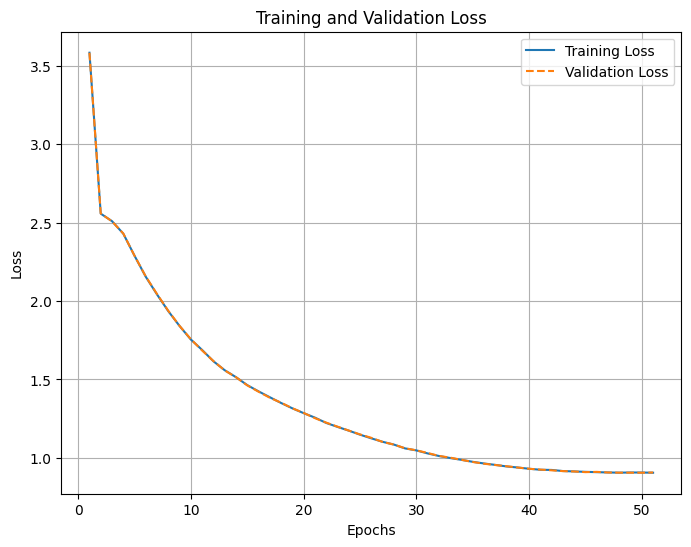

In [13]:
import matplotlib.pyplot as plt

epochs = range(1, len(lossi) + 1)  # Number of epochs

# Plotting the loss and validation loss
plt.figure(figsize=(8, 6))
plt.plot(epochs, lossi, label='Training Loss')
plt.plot(epochs, val_lossi, label='Validation Loss', linestyle='--')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.grid(True)
plt.show()

In [14]:
from tokenizer import CharacterTokenizer
import torch

tokenizer = CharacterTokenizer.load(tokenizer_dir)

Model loaded from character_tokenizer.pkl


In [15]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f"Using device: {device}")
tokens = model.generate(start_tokens, max_new_tokens=512, end_token_idx=tokenizer.token_to_idx[tokenizer.end_token])
print(tokenizer.decode_batch(tokens)[0])

Using device: cuda
<s>ტყვილი ნავი, ვქნა, რას ნისლი ნეჭარი...
სახს გაზაფხულზე თრთოლვა და მეც გიაფარგვავს;
სად წყნარად, თუ მისცემდს გზნება, ყვავილი ნუ ჟიხუ"მუნების ჟინი,
დაიტირევა ცის ჰანგსას, ვეგრებით შენ აღვო შენი ნამბავი,
ჩემს გულში ჩრდილა წვიმინ, მოგვრწყენებიას, -
ცაზე დამითრგულს, როგორც ლაღი, გაზაფხულზე,
ოჰ, გევედრებ ჩვენ სიტყვა ურაღდგებდა
ჩემთვის სიზმრად დაუკდი, მარტო, ვინ ვპოვე!

ოჰ, ყავ, უხე? გადაფანცული...
შენ აღარ ძლევს, ესლიერი ღამე!"


არ ის აღაცა სეთით წევს, მედებრა,
რომ განესვენებენ იაღვარსაც იშლება მოიშლიამ
ბრძოლმა 


# Summary
Multi head attention loss - 1.22

# Testing

In [16]:
tokenizer_dir = "character_tokenizer.pkl"
input_data_dir = 'gala.txt'
model_dir = "decoder_model_multihead_blocks.pth"

In [17]:
from nn import DecoderModel
from tokenizer import CharacterTokenizer
from config import ModelConfig
import torch

tokenizer = CharacterTokenizer.load(tokenizer_dir)
model_testing = DecoderModel(tokenizer.num_tokens,
                     ModelConfig.d_model,
                     ModelConfig.head_dim,
                     ModelConfig.block_size,
                     ModelConfig.n_head,
                     ModelConfig.ffn_dim,
                     ModelConfig.layers,
                     ModelConfig.dropout,
                     tokenizer.token_to_idx[tokenizer.pad_token])
model_testing.load_state_dict(torch.load(model_dir))

Model loaded from character_tokenizer.pkl


<All keys matched successfully>

In [19]:
start_tokens = torch.tensor([[tokenizer.token_to_idx[tokenizer.start_token]]]).to('cuda')
tokens = model.generate(start_tokens, max_new_tokens=512, end_token_idx=tokenizer.token_to_idx[tokenizer.end_token])
print(tokenizer.decode_batch(tokens)[0])

<s>სურვილების წსტრიან წმინდა,
გუშინ მტკოცნის აღარ გამძახდა;
სამარტო ვარსკვლავიანი შემოიჭრა ტანჯვა­წამების,
და ძილიერა აღმძაფელ და სწველი.
მთის შემოდგომის მას მისწრაფლ ჰანგებად
გადაშაშლილია ოცნება და იფანჯარა.
და უშფოთველი
მისკენ გუშმცი ძგერად გეძახო გაგვირგებინ...
ტბის ნება გარინდი ნალი,
გარშე იტანო, მაგრამ ტბამ გაგვაქვს ნუ დამჭვრთ,
მხოლოდ მნე ლოცვაში მქუხარის მხარეს,
რამე შენი ხელხით, მარტოობივ ვხედროვა,
მე სიტყვა, სიყვარულო...
"მეძლია დაუშვრალო!



წამთარი

ტკბილ ფერქნად წარსულს,
ქარიშალი დღის ტალღას თუ მძლე
